In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\DA Course Files\Projects\BrainWave Projects\retail_store_data_3000_rows.CSV')

In [3]:
df.head()

,Date,Customer ID,Store Location,Category,Product,Quantity,Price,Payment Method
0,2024-07-30,ec95d90f,Chicago,Clothing,Dress,1,151.56,Debit Card
1,2024-09-01,2bd091e2,Phoenix,Home Appliances,Mixer,5,103.54,Credit Card
2,2024-07-16,627ae7a6,New York,Electronics,Tablet,7,108.24,Mobile Payment
3,2024-05-20,340ace11,Houston,Electronics,Smartwatch,7,624.10,Mobile Payment
4,2024-12-14,47d0964d,Chicago,Electronics,Headphones,6,889.79,Debit Card


In [4]:
df.describe()

,Quantity,Price
count,3000.000000,3000.00000
mean,5.459667,236.55710
std,2.903191,248.35335
min,1.000000,5.05000
25%,3.000000,44.55500
50%,5.000000,144.84000
75%,8.000000,360.19250
max,10.000000,998.22000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3000 non-null   object 
 1   Customer ID     3000 non-null   object 
 2   Store Location  3000 non-null   object 
 3   Category        3000 non-null   object 
 4   Product         3000 non-null   object 
 5   Quantity        3000 non-null   int64  
 6   Price           3000 non-null   float64
 7   Payment Method  3000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 187.6+ KB


In [6]:
df.isnull().sum()

Date              0
Customer ID       0
Store Location    0
Category          0
Product           0
Quantity          0
Price             0
Payment Method    0
dtype: int64

In [7]:
columns_to_drop = ['Customer ID', 'Date'] 
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['Store Location', 'Category', 'Product', 'Quantity', 'Price',
       'Payment Method'],
      dtype='object')


In [9]:
df['Total Sales'] = df['Quantity'] * df['Price']

In [10]:
# Display unique categories in the 'Category' column
print(df['Category'].unique())

['Clothing' 'Home Appliances' 'Electronics' 'Groceries']


In [11]:
# Count the number of products in each category
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Clothing           820
Groceries          750
Electronics        741
Home Appliances    689
Name: count, dtype: int64


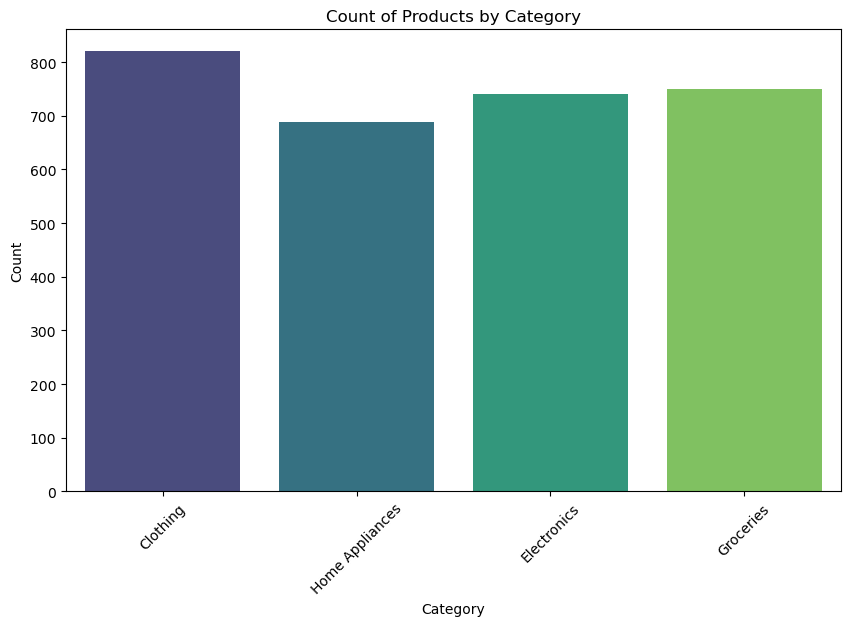

In [12]:
# Plot the count of each category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Analyze payment method distribution
payment_counts = df['Payment Method'].value_counts()
print(payment_counts)

Payment Method
Credit Card       798
Cash              760
Debit Card        739
Mobile Payment    703
Name: count, dtype: int64


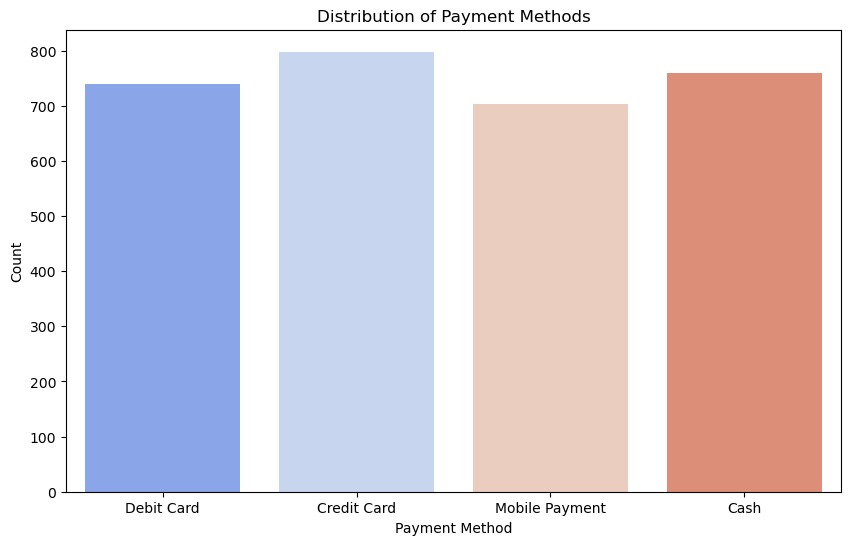

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, palette='coolwarm')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [15]:
# Average Total Sales by Product
avg_sales = df.groupby('Product')['Total Sales'].mean().sort_values(ascending=False) 
print(avg_sales)

Product
Smartphone         3352.161986
Smartwatch         3065.250861
Tablet             2995.146599
Laptop             2752.011169
Headphones         2691.389930
Microwave          1593.527823
Mixer              1580.063033
Refrigerator       1523.228244
Vacuum Cleaner     1515.126419
Air Conditioner    1509.421402
Shirt               662.745057
Jacket              606.517929
Jeans               602.920850
Dress               586.335380
Shoes               568.222092
Bread               162.426443
Eggs                155.783311
Vegetables          152.534268
Fruits              151.555535
Milk                148.319708
Name: Total Sales, dtype: float64


Text(0, 0.5, 'Product')

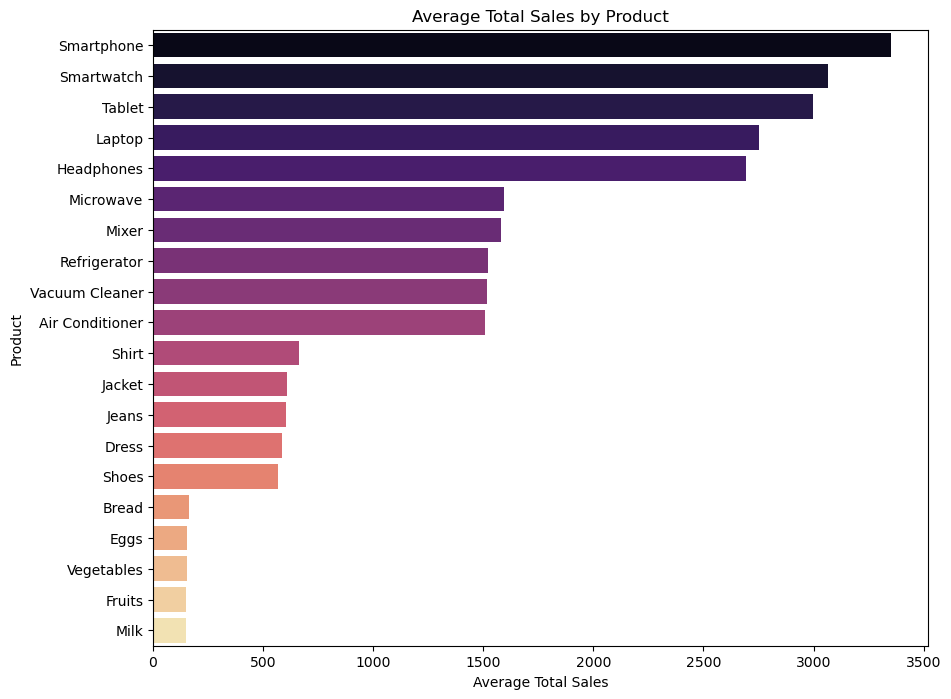

In [16]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='magma') 
plt.title('Average Total Sales by Product') 
plt.xlabel('Average Total Sales') 
plt.ylabel('Product')

In [17]:
location_sales = df.groupby('Store Location')['Total Sales'].sum() 
print(location_sales)

Store Location
Chicago        755399.13
Houston        814877.80
Los Angeles    748768.89
New York       766743.58
Phoenix        790025.89
Name: Total Sales, dtype: float64


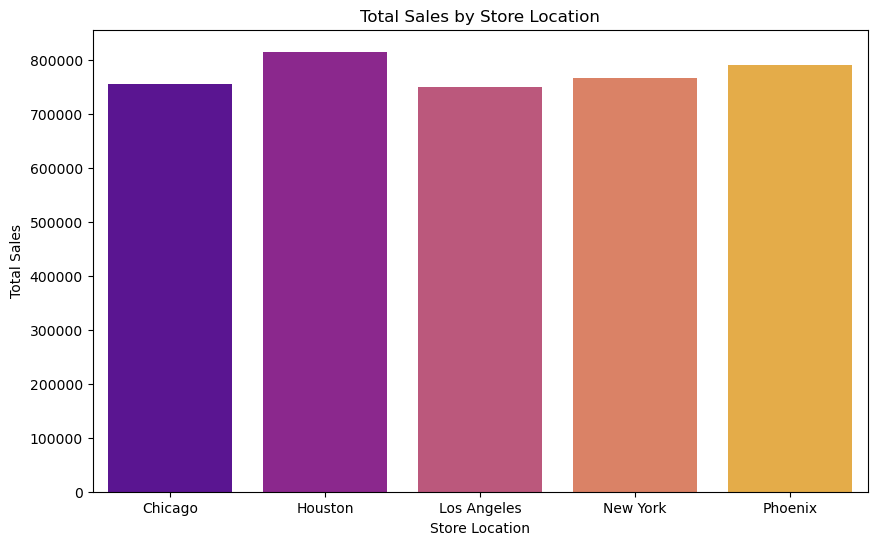

In [18]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=location_sales.index, y=location_sales.values, palette='plasma') 
plt.title('Total Sales by Store Location') 
plt.xlabel('Store Location') 
plt.ylabel('Total Sales') 
plt.show()

In [19]:
# Analyze total sales by product category
category_sales = df.groupby('Category')['Total Sales'].sum()
print(category_sales)

Category
Clothing            497267.39
Electronics        2201233.56
Groceries           115622.48
Home Appliances    1061691.86
Name: Total Sales, dtype: float64


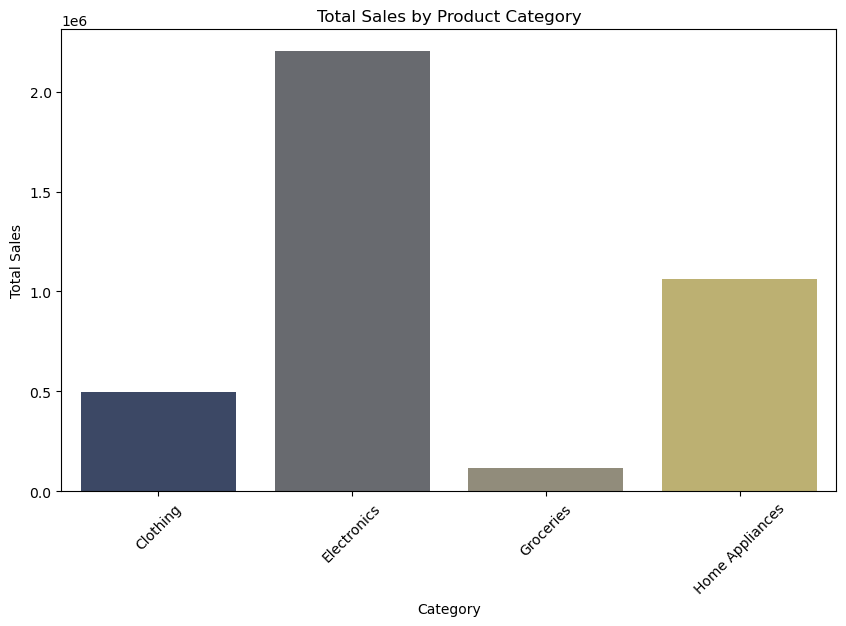

In [22]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=category_sales.index, y=category_sales.values, palette='cividis') 
plt.title('Total Sales by Product Category') 
plt.xlabel('Category') 
plt.ylabel('Total Sales') 
plt.xticks(rotation=45) 
plt.show()

In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns 
correlation_matrix = df[numeric_cols].corr()

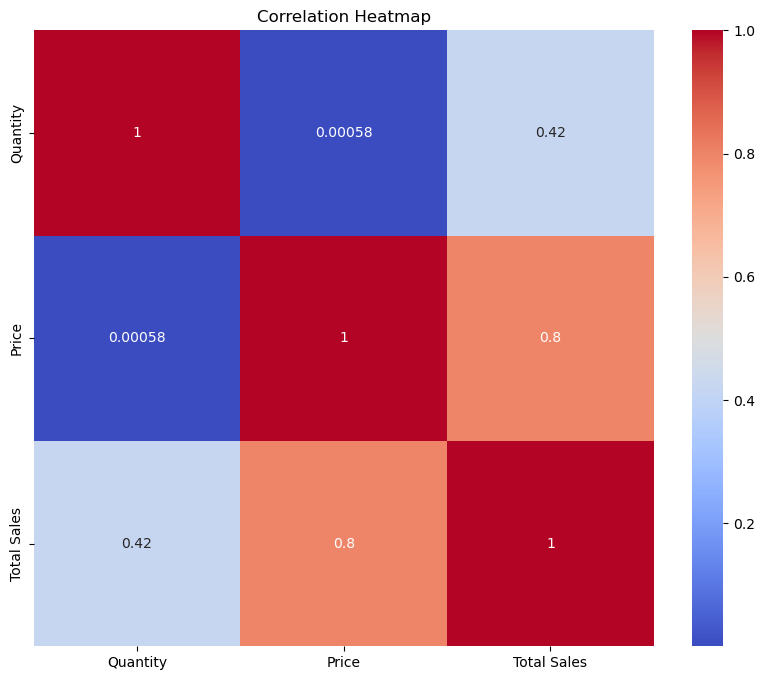

In [29]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap') 
plt.show()